Initial Data Exploration

Load the dataset using Pandas. Check for null values and understand data types.
Examine the time series properties of the data (e.g., frequency, trends).

In [62]:
import pandas as pd
df = pd.read_csv('AAPL, 1D 01012007-12072023.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4159 entries, 0 to 4158
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   volume        4159 non-null   float64
 1   vwap          4159 non-null   float64
 2   open          4159 non-null   float64
 3   close         4159 non-null   float64
 4   high          4159 non-null   float64
 5   low           4159 non-null   float64
 6   time          4159 non-null   int64  
 7   transactions  4159 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 260.1 KB


In [63]:
df.head()

,volume,vwap,open,close,high,low,time,transactions
0,1.245445e+09,3.0302,3.0821,2.9929,3.0921,2.9250,1167800400,189737
1,8.554834e+08,3.0403,3.0018,3.0593,3.0696,2.9936,1167886800,136333
2,8.352580e+08,3.0426,3.0632,3.0375,3.0786,3.0143,1167973200,141050
3,7.974138e+08,3.0683,3.0700,3.0525,3.0904,3.0457,1168232400,130547
4,3.352007e+09,3.1946,3.0875,3.3061,3.3207,3.0411,1168318800,569578


In [64]:
df['time'] = pd.to_datetime(df['time'], unit='s')


In [67]:
df.head()

,volume,vwap,open,close,high,low,time,transactions
0,1.245445e+09,3.0302,3.0821,2.9929,3.0921,2.9250,2007-01-03 05:00:00,189737
1,8.554834e+08,3.0403,3.0018,3.0593,3.0696,2.9936,2007-01-04 05:00:00,136333
2,8.352580e+08,3.0426,3.0632,3.0375,3.0786,3.0143,2007-01-05 05:00:00,141050
3,7.974138e+08,3.0683,3.0700,3.0525,3.0904,3.0457,2007-01-08 05:00:00,130547
4,3.352007e+09,3.1946,3.0875,3.3061,3.3207,3.0411,2007-01-09 05:00:00,569578


In [66]:
time_intervals = df['time'].diff().dropna()
print("Time intervals between consecutive data points:")
print(time_intervals.value_counts())


Time intervals between consecutive data points:
time
1 days 00:00:00    3258
3 days 00:00:00     716
4 days 00:00:00     112
2 days 00:00:00      38
2 days 23:00:00      17
3 days 01:00:00      16
5 days 00:00:00       1
Name: count, dtype: int64


In [68]:
# Check the frequency and trends
df.describe()

,volume,vwap,open,close,high,low,time,transactions
count,4.159000e+03,4159.000000,4159.000000,4159.000000,4159.000000,4159.000000,4159,4.159000e+03
mean,3.662925e+08,46.391382,46.362788,46.396058,46.881127,45.865790,2015-04-06 10:13:19.807646208,2.709318e+05
min,2.422234e+07,2.841000,2.835400,2.792900,2.928600,2.792900,2007-01-03 05:00:00,3.048700e+04
25%,1.067497e+08,11.936200,11.955700,11.947150,12.028400,11.853600,2011-02-16 17:00:00,1.128150e+05
50%,2.136463e+08,25.885200,25.775000,25.825000,26.262800,25.680000,2015-04-08 04:00:00,1.782460e+05
75%,4.965321e+08,52.154150,52.263750,52.231250,52.626250,51.796250,2019-05-23 16:00:00,3.259555e+05
max,3.373042e+09,193.102000,193.780000,193.970000,194.480000,191.760000,2023-07-12 04:00:00,2.966979e+06
std,3.724793e+08,50.277557,50.235593,50.293482,50.843874,49.680104,NaN,2.510859e+05


Data Visualization

Utilize Matplotlib to plot closing prices and traded volume over time.
Create a candlestick chart to depict high and low prices.

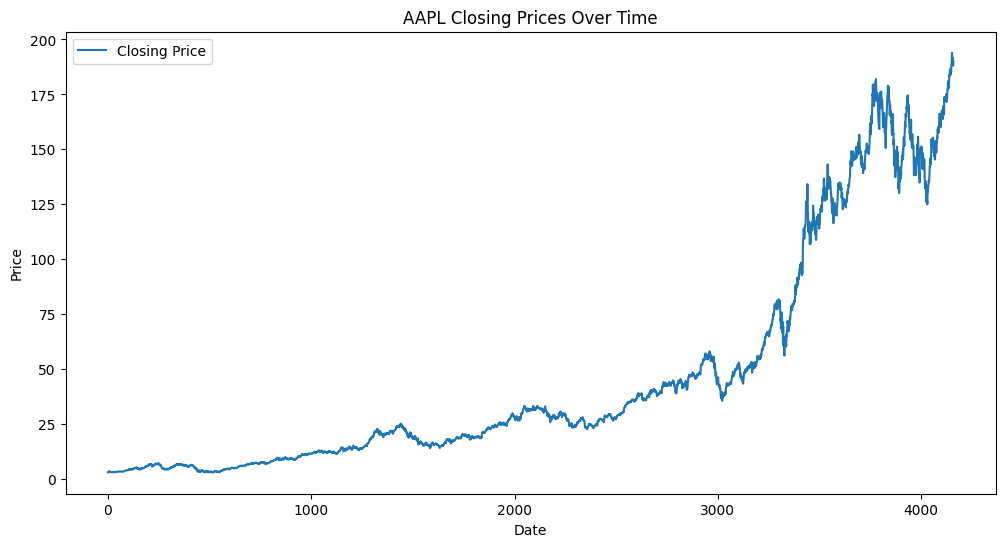

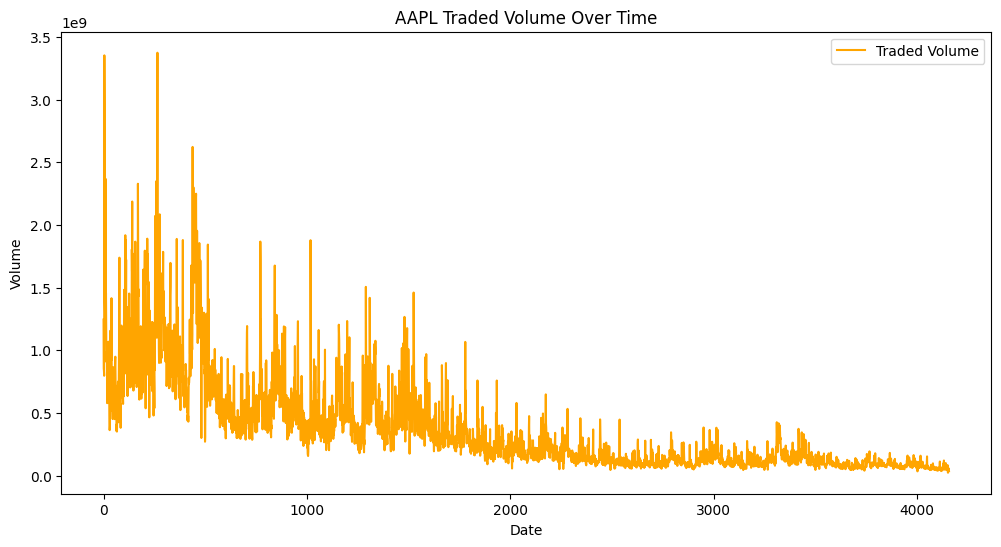

In [70]:
import matplotlib.pyplot as plt

# Plot closing prices
plt.figure(figsize=(12, 6))
plt.plot(df['close'], label='Closing Price')
plt.title('AAPL Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plot traded volume
plt.figure(figsize=(12, 6))
plt.plot(df['volume'], label='Traded Volume', color='orange')
plt.title('AAPL Traded Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

In [71]:
import plotly.graph_objects as go
# Plot the candlestick chart
fig = go.Figure(data=[go.Candlestick(x=df['time'],
                                     open=df['open'],
                                     high=df['high'],
                                     low=df['low'],
                                     close=df['close'])])
fig.show()


Statistical Analysis

Compute summary statistics (mean, median, standard deviation) for key columns.
# (close - open)/100 # avg by day. Percentage of changing price
# mean and median of all numerical values by all time and each year 
Analyze closing prices with a moving average.

In [72]:
df.head()

,volume,vwap,open,close,high,low,time,transactions
0,1.245445e+09,3.0302,3.0821,2.9929,3.0921,2.9250,2007-01-03 05:00:00,189737
1,8.554834e+08,3.0403,3.0018,3.0593,3.0696,2.9936,2007-01-04 05:00:00,136333
2,8.352580e+08,3.0426,3.0632,3.0375,3.0786,3.0143,2007-01-05 05:00:00,141050
3,7.974138e+08,3.0683,3.0700,3.0525,3.0904,3.0457,2007-01-08 05:00:00,130547
4,3.352007e+09,3.1946,3.0875,3.3061,3.3207,3.0411,2007-01-09 05:00:00,569578


In [74]:
df['percentage_change'] = (df['close'] - df['open']) / df['open'] * 100
df

,volume,vwap,open,close,high,low,time,transactions,percentage_change
0,1.245445e+09,3.0302,3.0821,2.9929,3.0921,2.9250,2007-01-03 05:00:00,189737,-2.894131
1,8.554834e+08,3.0403,3.0018,3.0593,3.0696,2.9936,2007-01-04 05:00:00,136333,1.915517
2,8.352580e+08,3.0426,3.0632,3.0375,3.0786,3.0143,2007-01-05 05:00:00,141050,-0.838992
3,7.974138e+08,3.0683,3.0700,3.0525,3.0904,3.0457,2007-01-08 05:00:00,130547,-0.570033
4,3.352007e+09,3.1946,3.0875,3.3061,3.3207,3.0411,2007-01-09 05:00:00,569578,7.080162
...,...,...,...,...,...,...,...,...,...
4154,4.515552e+07,190.8214,189.8400,191.8100,192.0200,189.2000,2023-07-06 04:00:00,562755,1.037716
4155,4.675750e+07,191.4218,191.4100,190.6800,192.6700,190.2400,2023-07-07 04:00:00,538826,-0.381380
4156,5.991216e+07,188.3628,189.2600,188.6100,189.9900,187.0350,2023-07-10 04:00:00,736912,-0.343443
4157,4.663812e+07,187.8219,189.1600,188.0800,189.3000,186.6000,2023-07-11 04:00:00,577717,-0.570945


In [91]:
mean_all_time = df.mean()
median_all_time = df.median()
mean_all_time

volume                            366292450.046886
vwap                                     46.391382
open                                     46.362788
close                                    46.396058
high                                     46.881127
low                                       45.86579
time                 2015-04-06 10:13:19.807646208
transactions                         270931.774465
percentage_change                         0.029346
dtype: object

In [92]:
median_all_time

volume                       213646276.0
vwap                             25.8852
open                              25.775
close                             25.825
high                             26.2628
low                                25.68
time                 2015-04-08 04:00:00
transactions                    178246.0
percentage_change               0.060347
dtype: object

In [89]:
mean_by_year = df.groupby(df['time'].dt.year).mean()
median_by_year = df.groupby(df['time'].dt.year).median()
mean_by_year

,volume,vwap,open,close,high,low,time,transactions,percentage_change
time,,,,,,,,,
2007,9.854333e+08,4.583000,4.585554,4.581222,4.646325,4.508272,2007-07-02 22:53:18.406374656,165724.147410,-0.056683
2008,1.130935e+09,5.074039,5.082639,5.070867,5.182533,4.961070,2008-07-02 09:10:54.545454592,223379.193676,-0.184101
2009,5.689824e+08,5.243333,5.236404,5.243364,5.303420,5.177019,2009-07-03 10:26:11.428571392,108283.436508,0.203925
2010,5.990311e+08,9.279007,9.284238,9.280176,9.370313,9.173143,2010-07-03 20:49:02.857143040,118597.912698,-0.038507
2011,4.922560e+08,13.000559,13.002193,13.000154,13.122269,12.868358,2011-07-02 17:51:54.285714432,104471.202381,-0.005751
2012,5.278878e+08,20.575760,20.594736,20.573207,20.779477,20.352976,2012-07-01 06:38:52.800000000,109457.892000,-0.081597
2013,4.064722e+08,16.892484,16.897428,16.879816,17.058532,16.724446,2013-07-02 15:23:20.000000000,84324.492063,-0.094374
2014,2.527564e+08,23.070142,23.054943,23.066142,23.253156,22.871193,2014-07-02 23:51:54.285714432,188315.777778,0.056444
2015,2.072952e+08,30.018348,30.042382,30.009967,30.310181,29.715740,2015-07-03 11:06:11.428571392,267957.690476,-0.096474


In [90]:
median_by_year

,volume,vwap,open,close,high,low,time,transactions,percentage_change
time,,,,,,,,,
2007,8.997300e+08,4.42000,4.42710,4.42500,4.47070,4.33930,2007-07-03 04:00:00,148382.0,-0.022865
2008,1.042174e+09,5.30510,5.28790,5.29930,5.38960,5.20890,2008-07-02 04:00:00,197233.0,0.072165
2009,5.186561e+08,5.07210,5.07695,5.08520,5.13140,4.99695,2009-07-04 04:00:00,96421.0,0.123315
2010,5.500505e+08,9.20260,9.17625,9.18090,9.27770,9.08570,2010-07-04 04:00:00,105871.0,0.049224
2011,4.403298e+08,12.78895,12.76140,12.75085,12.85660,12.64715,2011-07-03 04:00:00,92600.0,-0.029725
2012,4.875142e+08,20.82565,20.75965,20.80325,21.01110,20.51785,2012-06-30 16:00:00,99877.5,-0.016887
2013,3.590918e+08,16.44510,16.46610,16.46685,16.63355,16.27480,2013-07-02 16:00:00,75771.0,-0.039956
2014,2.288510e+08,23.47470,23.48815,23.47485,23.68750,23.29125,2014-07-02 16:00:00,179861.5,0.032420
2015,1.893435e+08,30.12595,30.12000,30.07500,30.39625,29.83750,2015-07-04 04:00:00,240712.5,-0.111093


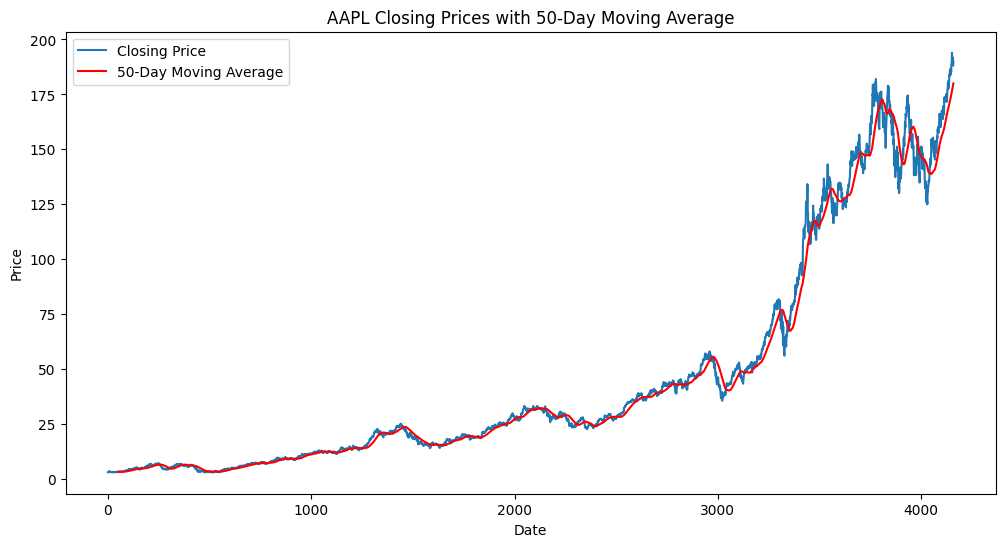

In [93]:
# Analyze closing prices with a moving average.

# Calculate moving average
df['MA_50'] = df['close'].rolling(window=50).mean()

plt.figure(figsize=(12, 6))
plt.plot(df['close'], label='Closing Price')
plt.plot(df['MA_50'], label='50-Day Moving Average', color='red')
plt.title('AAPL Closing Prices with 50-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

Hypothesis Testing

Execute a t-test to compare average closing prices across different years.
Examine daily returns’ distribution and test for normality using SciPy. ???

In [97]:
from scipy.stats import ttest_ind

# Extract closing prices for two different years
closing_2019 = df[df['time'].dt.year == 2019]['close']
closing_2020 = df[df['time'].dt.year == 2020]['close']

# Perform t-test
t_stat, p_val = ttest_ind(closing_2019, closing_2020, nan_policy='omit')
print(f"T-statistic: {t_stat}, P-value: {p_val}")


T-statistic: -29.299518979994406, P-value: 7.808254624125693e-111
